# Import Required Libraries
We will import pandas, matplotlib, scikit-learn, and any other necessary libraries for data analysis, visualization, and SVM modeling.

In [1]:
import sys
print(sys.executable)

/Users/manjulmayank/Desktop/trading-pipeline/.venv/bin/python


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Load the equity curve data
curve = pd.read_csv('equity_curve.csv')
curve.head()

,symbol,series,date,prev_close,open,high,low,last,close,AVG_PRICE,...,close_lag_5,ret_lag_5,close_lag_10,ret_lag_10,y_ret,y_cls,signal,shift_sig,strat_ret,equity_curve
0,HDFCBANK,EQ,2025-05-16,1933.8,1933.8,1943.8,1928.4,1934.5,1934.7,1933.50,...,1889.7,-2.011926,1925.0,0.000000,0.206750,0,-1,0.0,0.000000,1.000000
1,TCS,EQ,2025-05-16,3579.9,3593.9,3593.9,3546.1,3561.3,3561.3,3559.81,...,3440.3,-0.249355,3444.7,-0.260590,-1.193384,-1,-1,-1.0,-0.841251,0.158749
2,ICICIBANK,EQ,2025-05-16,1450.8,1453.3,1458.7,1447.0,1452.4,1454.0,1454.25,...,1388.9,-3.246256,1432.4,0.378416,-0.343879,0,1,-1.0,0.591722,0.252685
3,RELIANCE,EQ,2025-05-16,1454.2,1453.2,1461.0,1447.3,1454.8,1456.4,1455.16,...,1377.2,-2.117982,1422.4,1.238434,-1.071134,-1,1,1.0,0.001151,0.252976
4,INFY,EQ,2025-05-16,1613.0,1612.6,1612.6,1581.5,1589.4,1589.9,1591.32,...,1507.6,-0.251423,1506.8,0.446637,-1.893201,-1,-1,1.0,0.091664,0.276165


# SVM Modeling: Predicting Up/Down Movement
We will use the equity curve to create a target variable indicating whether the equity increased (1) or decreased (0) on the next day, and train a Support Vector Machine (SVM) classifier to predict this movement.

In [5]:
# Create target: 1 if equity increases next day, else 0
curve['target'] = (curve['equity_curve'].shift(-1) > curve['equity_curve']).astype(int)
# Example feature: daily return
curve['return'] = curve['equity_curve'].pct_change()
# Drop last row (no target)
data = curve.dropna().copy()
X = data[['return']]
y = data['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train SVM
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        49
           1       0.00      0.00      0.00        16

    accuracy                           0.75        65
   macro avg       0.38      0.50      0.43        65
weighted avg       0.57      0.75      0.65        65

Accuracy: 0.7538461538461538


/Users/manjulmayank/Desktop/trading-pipeline/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manjulmayank/Desktop/trading-pipeline/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manjulmayank/Desktop/trading-pipeline/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        49
           1       0.00      0.00      0.00        16

    accuracy                           0.75        65
   macro avg       0.38      0.50      0.43        65
weighted avg       0.57      0.75      0.65        65

Accuracy: 0.7538461538461538


/Users/manjulmayank/Desktop/trading-pipeline/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manjulmayank/Desktop/trading-pipeline/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manjulmayank/Desktop/trading-pipeline/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

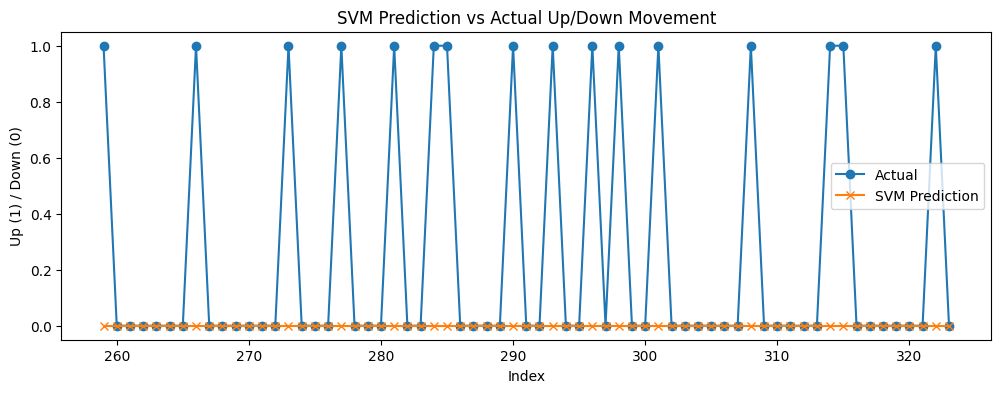

In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train SVM
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Plot SVM predictions vs actual
plt.figure(figsize=(12,4))
plt.plot(data.index[-len(y_test):], y_test.values, label='Actual', marker='o')
plt.plot(data.index[-len(y_test):], y_pred, label='SVM Prediction', marker='x')
plt.xlabel('Index')
plt.ylabel('Up (1) / Down (0)')
plt.title('SVM Prediction vs Actual Up/Down Movement')
plt.legend()
plt.show()

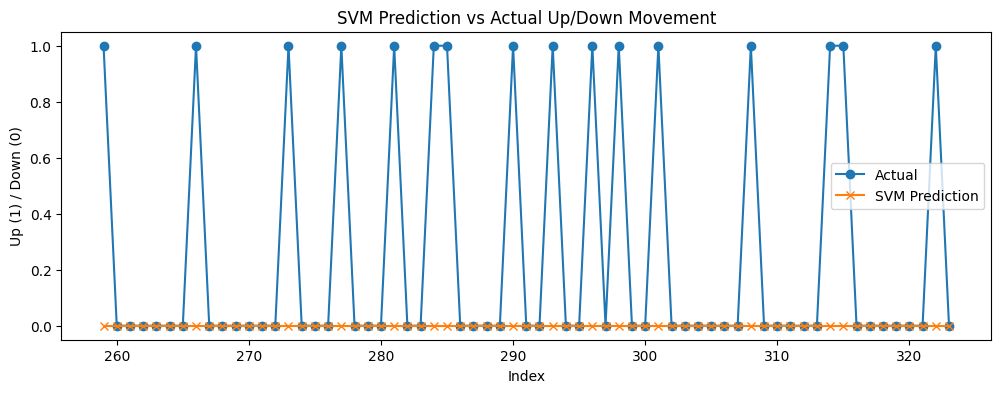

In [7]:
# Plot SVM predictions vs actual
plt.figure(figsize=(12,4))
plt.plot(data.index[-len(y_test):], y_test.values, label='Actual', marker='o')
plt.plot(data.index[-len(y_test):], y_pred, label='SVM Prediction', marker='x')
plt.xlabel('Index')
plt.ylabel('Up (1) / Down (0)')
plt.title('SVM Prediction vs Actual Up/Down Movement')
plt.legend()
plt.show()

In [8]:
# Debug: Check columns and preview data
print(curve.columns)
print(curve.head())

Index(['symbol', 'series', 'date', 'prev_close', 'open', 'high', 'low', 'last',
       'close', 'AVG_PRICE', 'volume', 'turnover_lacs', 'num_trades',
       'deliv_qty', 'deliv_per', 'ret_1d', 'ret_5d', 'vwap_proxy', 'sma_5',
       'sma_20', 'ema_12', 'ema_26', 'rsi_14', 'macd', 'macd_signal',
       'macd_hist', 'bb_mid', 'bb_upper', 'bb_lower', 'atr_14', 'close_lag_1',
       'ret_lag_1', 'close_lag_2', 'ret_lag_2', 'close_lag_3', 'ret_lag_3',
       'close_lag_5', 'ret_lag_5', 'close_lag_10', 'ret_lag_10', 'y_ret',
       'y_cls', 'signal', 'shift_sig', 'strat_ret', 'equity_curve', 'target',
       'return'],
      dtype='object')
      symbol series        date  prev_close    open    high     low    last  \
0   HDFCBANK     EQ  2025-05-16      1933.8  1933.8  1943.8  1928.4  1934.5   
1        TCS     EQ  2025-05-16      3579.9  3593.9  3593.9  3546.1  3561.3   
2  ICICIBANK     EQ  2025-05-16      1450.8  1453.3  1458.7  1447.0  1452.4   
3   RELIANCE     EQ  2025-05-16      1454

# Enhanced Visualization of Equity Curve
We will use Plotly for interactive visualization and Seaborn for a visually appealing static plot of the equity curve.

In [9]:
import nbformat
print(nbformat.__version__)

5.10.4


In [10]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install --upgrade jupyter ipython


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [12]:
import plotly.express as px

# Ensure date is datetime
equity_df = curve.copy()
equity_df['date'] = pd.to_datetime(curve['date'])

fig = px.line(equity_df, x='date', y='equity_curve', title='Interactive Equity Curve',
              labels={'date': 'Date', 'equity_curve': 'Equity Curve'},
              template='plotly_dark')
fig.update_traces(line=dict(width=3))
fig.show()

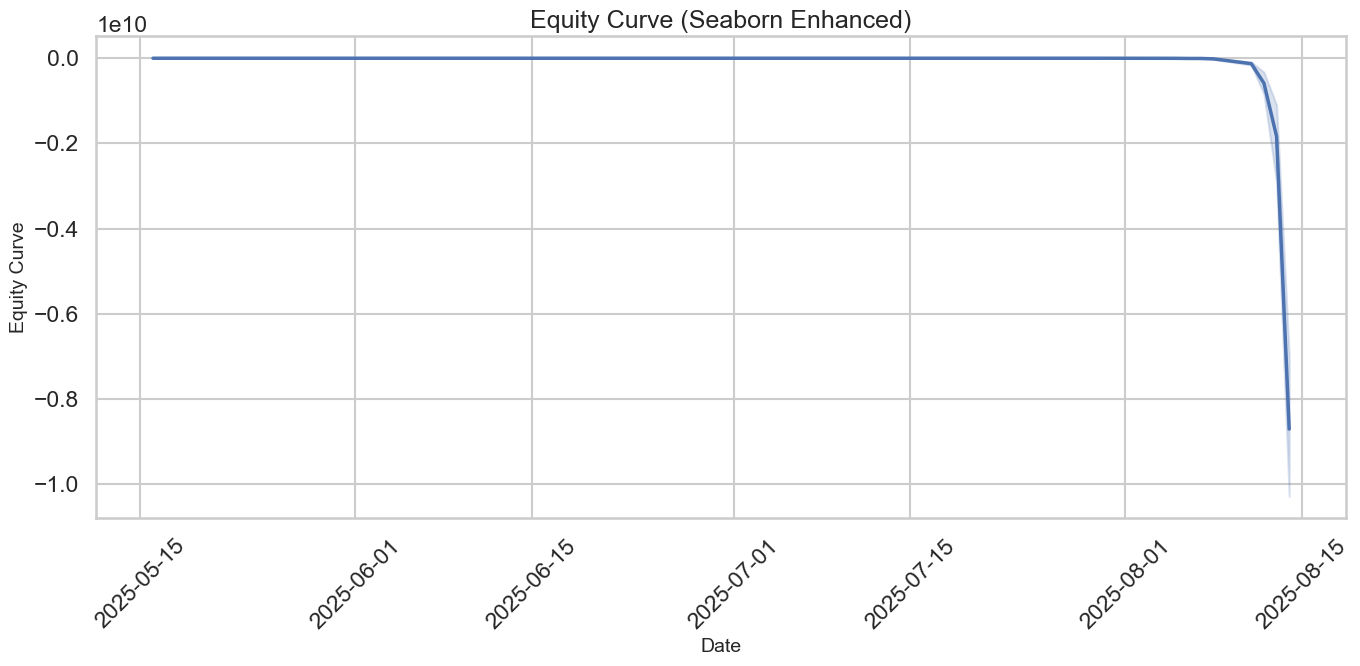

In [13]:
import seaborn as sns
sns.set(style='whitegrid', context='talk', palette='deep')

plt.figure(figsize=(14, 7))
sns.lineplot(data=equity_df, x='date', y='equity_curve', linewidth=2.5)
plt.title('Equity Curve (Seaborn Enhanced)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Equity Curve', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Machine Learning Comparison for Equity Curve Prediction

We will engineer features from the equity curve and compare multiple machine learning models:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)

We will use rolling statistics and lagged returns as features, and compare model performance for predicting next-day up/down movement.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('equity_curve.csv')
df['date'] = pd.to_datetime(df['date'])

# Feature engineering
# 1. Daily return
# 2. Rolling mean/volatility
# 3. Lagged returns

df['return'] = df['equity_curve'].pct_change()
df['roll_mean_5'] = df['equity_curve'].rolling(5).mean()
df['roll_std_5'] = df['equity_curve'].rolling(5).std()
df['return_lag_1'] = df['return'].shift(1)
df['return_lag_2'] = df['return'].shift(2)

# Target: 1 if equity_curve increases next day, else 0
df['target'] = (df['equity_curve'].shift(-1) > df['equity_curve']).astype(int)

# Drop rows with NaN (from rolling/lags)
data = df.dropna().copy()
features = ['return', 'roll_mean_5', 'roll_std_5', 'return_lag_1', 'return_lag_2']
X = data[features]
y = data['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'\n{name} Accuracy: {acc:.3f}')
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.281
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        49
           1       0.25      1.00      0.39        15

    accuracy                           0.28        64
   macro avg       0.62      0.53      0.26        64
weighted avg       0.82      0.28      0.18        64


Random Forest Accuracy: 0.328
              precision    recall  f1-score   support

           0       0.71      0.20      0.32        49
           1       0.22      0.73      0.34        15

    accuracy                           0.33        64
   macro avg       0.47      0.47      0.33        64
weighted avg       0.60      0.33      0.32        64


SVM Accuracy: 0.766
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        49
           1       0.00      0.00      0.00        15

    accuracy                           0.77        64
   macro avg       0.38      0.50      

/Users/manjulmayank/Desktop/trading-pipeline/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/manjulmayank/Desktop/trading-pipeline/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/manjulmayank/Desktop/trading-pipeline/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/var/folders/nc/nyzq_bys0dl6667pjw956zjc0000gn/T/ipykernel_76435/2908102912.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




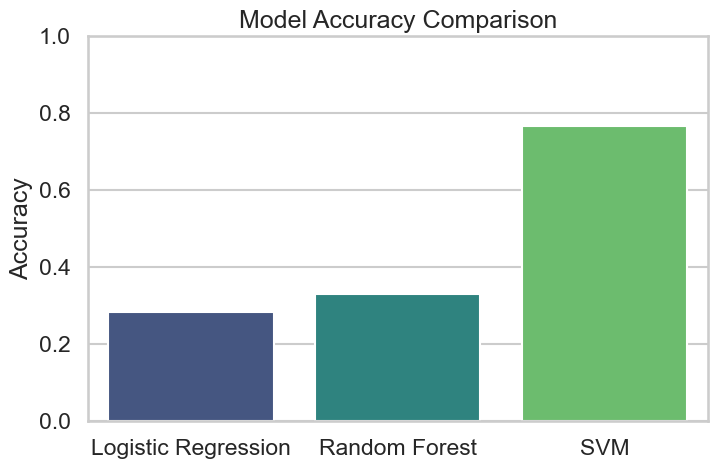

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize model comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

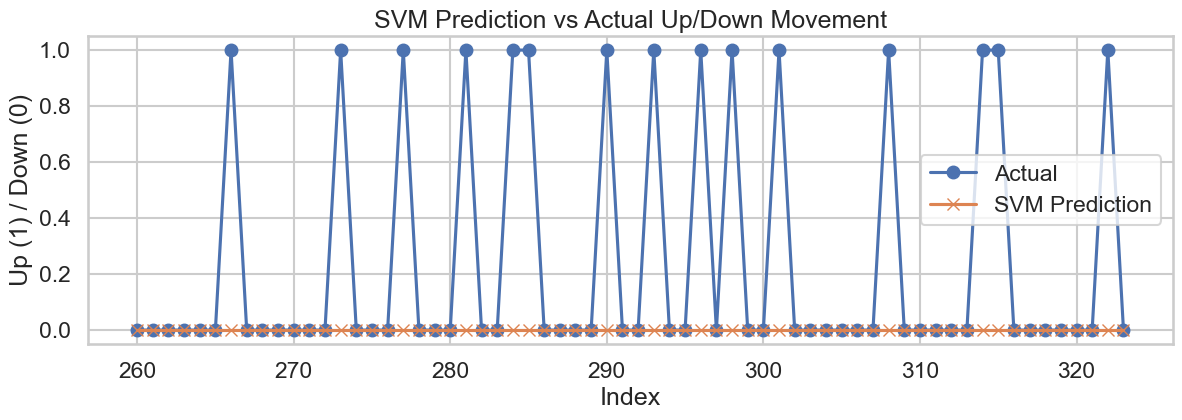

In [18]:
# Plot actual vs predicted for the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(14,4))
plt.plot(data.index[-len(y_test):], y_test.values, label='Actual', marker='o')
plt.plot(data.index[-len(y_test):], y_pred_best, label=f'{best_model_name} Prediction', marker='x')
plt.xlabel('Index')
plt.ylabel('Up (1) / Down (0)')
plt.title(f'{best_model_name} Prediction vs Actual Up/Down Movement')
plt.legend()
plt.show()